In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("bmh")
%matplotlib inline

**1. Capacity**

In [3]:
off = pypsa.Network("elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc")

n1 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc")
n5_3 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.7.nc")
n5_11 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc")
n25 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc")
n50 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-

1.1 Plotting the power capacity

In [4]:
# power capacity DataFrame without MDES
gen_off = off.generators.groupby("carrier").p_nom_opt.sum()
sto_u_off = off.storage_units.groupby("carrier").p_nom_opt.sum()
sto_off = off.links.loc[~(off.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
off_cap = pd.concat([gen_off, sto_u_off, sto_off], axis=0)
off_cap = off_cap.rename("without MDES")

# power capacity DataFrame with MDES in 1€/kWh,300€/kW
gen_cap1 = n1.generators.groupby("carrier").p_nom_opt.sum()
sto_u1 = n1.storage_units.groupby("carrier").p_nom_opt.sum()
sto1 = n1.links.loc[~(n1.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap1 = pd.concat([gen_cap1, sto_u1, sto1], axis=0)
max_cap1.rename("MDES in 1€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 5€/kWh,300€/kW
gen_cap5_3 = n5_3.generators.groupby("carrier").p_nom_opt.sum()
sto_u5_3 = n5_3.storage_units.groupby("carrier").p_nom_opt.sum()
sto5_3 = n5_3.links.loc[~(n5_3.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap5_3 = pd.concat([gen_cap5_3, sto_u5_3, sto5_3], axis=0)
max_cap5_3.rename("MDES in 5€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 5€/kWh,1100€/kW,70%
gen_cap5_11 = n5_11.generators.groupby("carrier").p_nom_opt.sum()
sto_u5_11 = n5_11.storage_units.groupby("carrier").p_nom_opt.sum()
sto5_11 = n5_11.links.loc[~(n5_11.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap5_11 = pd.concat([gen_cap5_11, sto_u5_11, sto5_11], axis=0)
max_cap5_11.rename("MDES in 5€/kWh,1100€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 25€/kWh,300€/kW
gen_cap25 = n25.generators.groupby("carrier").p_nom_opt.sum()
sto_u25 = n25.storage_units.groupby("carrier").p_nom_opt.sum()
sto25 = n25.links.loc[~(n25.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap25 = pd.concat([gen_cap25, sto_u25, sto25], axis=0)
max_cap25.rename("MDES in 25€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 50€/kWh,100€/kW
gen_cap50 = n50.generators.groupby("carrier").p_nom_opt.sum()
sto_u50 = n50.storage_units.groupby("carrier").p_nom_opt.sum()
sto50 = n50.links.loc[~(n50.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap50 = pd.concat([gen_cap50, sto_u50, sto50], axis=0)
max_cap50.rename("MDES in 50€/kWh,100€/kW,80%", inplace=True)


carrier
biomass               1.358976e+04
geothermal            7.660000e+02
nuclear               1.000379e+05
offwind-ac            1.120506e+04
offwind-dc            1.670930e+04
onwind                4.882380e+05
ror                   4.252265e+04
solar                 1.086241e+06
PHS                   3.192695e+04
hydro                 7.774317e+04
H2 electrolysis       9.620959e+04
H2 fuel cell          1.867660e+05
battery charger       6.892004e+04
battery discharger    7.034122e+04
mdes-charger          2.049363e+05
mdes-discharger       9.663193e+04
Name: MDES in 50€/kWh,100€/kW,80%, dtype: float64

In [5]:
cap = pd.concat([off_cap, max_cap1, max_cap5_3, max_cap5_11, max_cap25, max_cap50], axis=1)
cap.fillna(0, inplace=True)

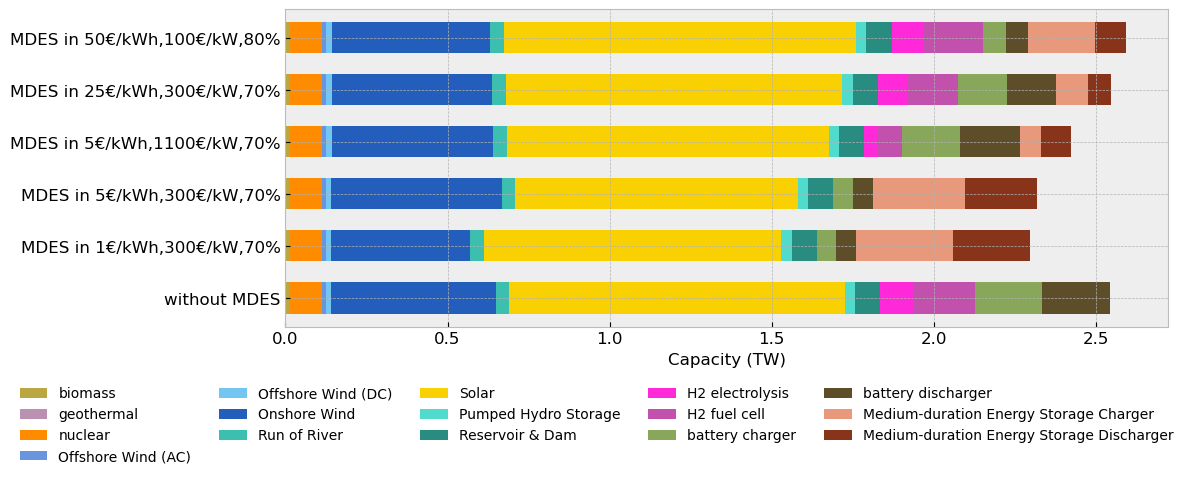

In [6]:
cap.T.div(1e6).plot(kind='barh', color=cap.index.map(n1.carriers.color),stacked=True, width=0.6, figsize=(12, 5))
plt.xlabel("Capacity (TW)", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
#plt.title("Optimal power capacity comparison")
plt.legend(labels=cap.index.map(n1.carriers.nice_name),ncol=5,prop={'size':10}, bbox_to_anchor=(1.02, -0.15),frameon=False)
plt.tight_layout()
plt.savefig('Optimal power capacity comparison.pdf')
plt.show()

1.2 Plotting the storage capacity

In [7]:
c_sto = n1.stores.groupby("carrier").e_nom_opt.sum()
c_sto = c_sto.rename("MDES in 1€/kWh,300€/kW,70%")
c_sto5_3 = n5_3.stores.groupby("carrier").e_nom_opt.sum()
c_sto5_3 = c_sto5_3.rename("MDES in 5€/kWh,300€/kW,70%")
c_sto5_11 = n5_11.stores.groupby("carrier").e_nom_opt.sum()
c_sto5_11 = c_sto5_11.rename("MDES in 5€/kWh,1100€/kW,70%")
c_sto25 = n25.stores.groupby("carrier").e_nom_opt.sum()
c_sto25 = c_sto25.rename("MDES in 25€/kWh,300€/kW,70%")
c_sto50 = n50.stores.groupby("carrier").e_nom_opt.sum()
c_sto50 = c_sto50.rename("MDES in 50€/kWh,100€/kW,80%")

In [8]:
c_sto_off = off.stores.groupby("carrier").e_nom_opt.sum()
c_sto_off.rename("without MDES", inplace=True)

carrier
H2         7.869422e+07
battery    1.245459e+06
Name: without MDES, dtype: float64

In [9]:
stores = pd.concat([c_sto_off,c_sto,c_sto5_3, c_sto5_11, c_sto25, c_sto50], axis=1)

In [10]:
sto_unit = (n1.storage_units.p_nom_opt * n1.storage_units.max_hours).groupby(n1.storage_units.carrier).sum()
sto_unit = sto_unit.rename("MDES in 1€/kWh,300€/kW,70%")
sto_unit5_3 = (n5_3.storage_units.p_nom_opt * n5_3.storage_units.max_hours).groupby(n5_3.storage_units.carrier).sum()
sto_unit5_3 = sto_unit5_3.rename("MDES in 5€/kWh,300€/kW,70%")
sto_unit5_11 = (n5_11.storage_units.p_nom_opt * n5_11.storage_units.max_hours).groupby(n5_11.storage_units.carrier).sum()
sto_unit5_11 = sto_unit5_11.rename("MDES in 5€/kWh,1100€/kW,70%")
sto_unit25 = (n25.storage_units.p_nom_opt * n25.storage_units.max_hours).groupby(n25.storage_units.carrier).sum()
sto_unit25 = sto_unit25.rename("MDES in 25€/kWh,300€/kW,70%")
sto_unit50 = (n50.storage_units.p_nom_opt * n50.storage_units.max_hours).groupby(n50.storage_units.carrier).sum()
sto_unit50 = sto_unit50.rename("MDES in 50€/kWh,100€/kW,80%")

In [11]:
sto_unit_off = (off.storage_units.p_nom_opt * off.storage_units.max_hours).groupby(off.storage_units.carrier).sum()
sto_unit_off = sto_unit_off.rename("without MDES")

In [12]:
storageunit = pd.concat([sto_unit_off, sto_unit, sto_unit5_3, sto_unit5_11, sto_unit25, sto_unit50], axis=1)

In [13]:
storage = pd.concat([stores, storageunit], axis=0)
storage.head()

,without MDES,"MDES in 1€/kWh,300€/kW,70%","MDES in 5€/kWh,300€/kW,70%","MDES in 5€/kWh,1100€/kW,70%","MDES in 25€/kWh,300€/kW,70%","MDES in 50€/kWh,100€/kW,80%"
carrier,,,,,,
H2,7.869422e+07,9.668094e+01,8.705182e+02,4.767895e+07,7.495258e+07,7.978536e+07
battery,1.245459e+06,1.972091e+05,2.243978e+05,9.581364e+05,7.818782e+05,3.855140e+05
MDES,NaN,7.180497e+07,3.657484e+07,1.474096e+07,2.201326e+06,1.237298e+06
PHS,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06
hydro,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08


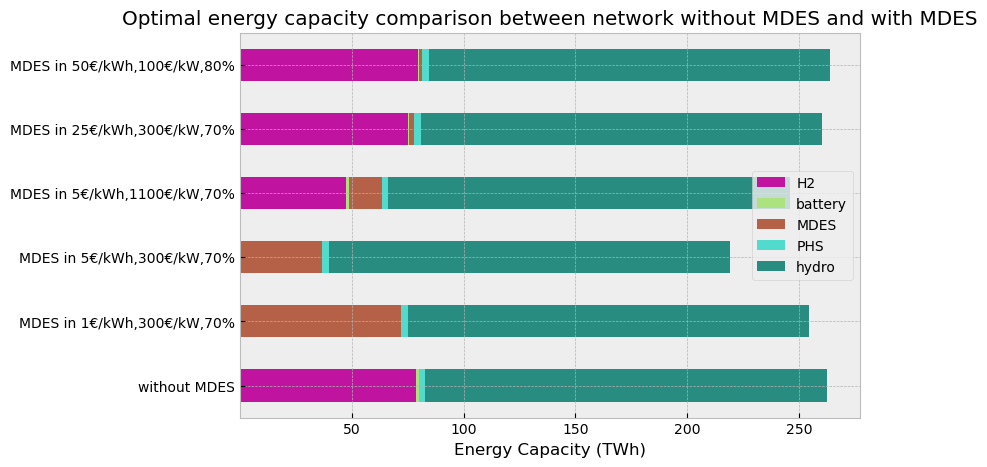

In [14]:
storage.T.div(1e6).plot(kind='barh', color=storage.index.map(n1.carriers.color),stacked=True, width=0.5,figsize=(8,5))
plt.xlabel("Energy Capacity (TWh)")
plt.xticks(rotation=0)
plt.title("Optimal energy capacity comparison between network without MDES and with MDES")
plt.legend(loc="best")
plt.show()

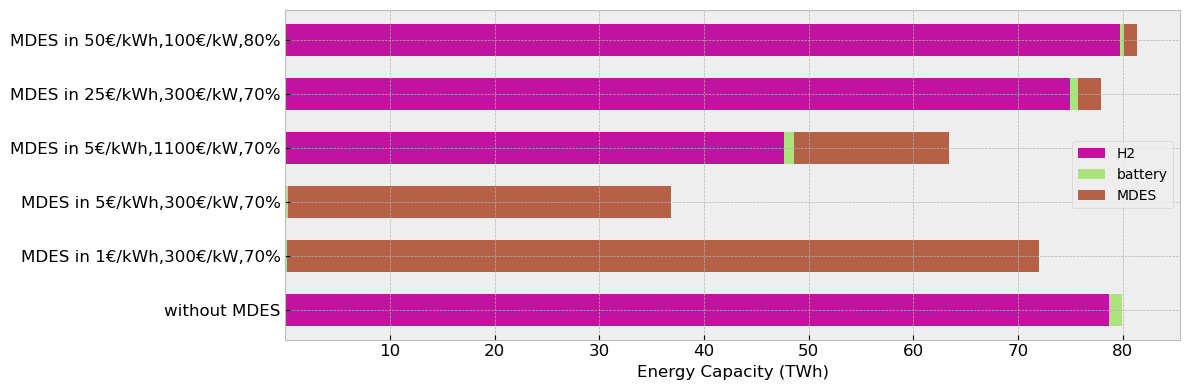

In [15]:
storage.iloc[:3,:].T.div(1e6).plot(kind='barh', color=storage.index.map(n1.carriers.color),stacked=True, width=0.6,figsize=(12,4))
plt.xlabel("Energy Capacity (TWh)", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.legend(ncol=1,prop={'size':10})
#plt.title("Optimal energy capacity comparison")
plt.tight_layout()
plt.savefig('Optimal energy capacity comparison.pdf')
plt.show()

**2. Duration analysis**

2.1 EP ratio comparison

In [16]:
capacities = pd.read_csv("nodal_capacities.csv",  index_col=2, header = 2)
efficiency = pd.read_csv("efficiency_MDES.csv", index_col=0, header=2)

In [17]:
sto_cap =capacities[(capacities['opt'] == "stores") | (capacities['opt'] == "links")].dropna()

In [18]:
sto_cap.rename(columns={'Unnamed: 1': 'region'}, inplace=True)
sto_cap.drop("opt",axis=1, inplace=True)

In [19]:
sto_cap

,region,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
H2 electrolysis,AL1 0,0.009403,0.010018,0.011630,0.012349,0.014936,0.015480,0.017725,2.883378e-02,0.007716,...,0.023820,0.025274,0.023568,0.015968,0.023588,0.021728,0.022079,0.031323,0.023995,0.018784
H2 fuel cell,AL1 0,0.003654,0.003733,0.004575,0.005221,0.006485,0.007629,0.009321,1.673549e-02,0.002769,...,0.020769,0.022074,0.020128,0.014384,0.021010,0.019182,0.020840,0.027429,0.022117,0.017066
battery charger,AL1 0,1820.681067,2211.032847,2176.343397,2460.368962,2660.869643,2742.231380,2880.188474,2.716735e+03,199.144656,...,2349.972567,2348.782272,2353.056955,2349.877870,2350.232940,2350.152066,2349.773635,2349.621231,2350.252580,2349.236043
battery discharger,AL1 0,1858.224833,2256.625950,2221.221179,2511.103557,2715.738707,2798.778182,2939.580052,2.772756e+03,203.251164,...,2398.430708,2397.215868,2401.578698,2398.334058,2398.696450,2398.613909,2398.227674,2398.072127,2398.716495,2397.678996
mdes-charger,AL1 0,2198.207520,969.370339,74.108907,0.047262,0.016819,0.011388,0.008709,9.662357e-03,2647.469285,...,0.003670,0.003748,0.029838,0.008501,0.009538,0.006616,0.004885,0.006184,0.003955,0.002837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDES,SI1 0,130.681344,46.706270,27.162814,18.959218,18.170754,15.898630,19.001725,2.951192e+01,51759.436643,...,0.024617,0.024082,0.035828,0.019106,0.029731,0.025440,0.022243,0.033489,0.022666,0.018502
battery,SI1 0,1352.712447,1211.699356,2693.756202,4886.264427,4493.999470,3395.568823,2607.873893,1.993902e+03,270.203968,...,1022.099646,1017.679499,1026.119211,1012.979417,1022.171800,1012.249300,1022.550392,1022.262673,1027.427073,1023.729302
H2,SK1 0,3.814774,3.214320,3.569945,3.500910,5.192343,7.948296,11.064868,2.304853e+01,2.852510,...,577214.888417,577019.336801,575701.372054,576375.684619,577191.505840,576472.593887,577241.137212,577425.860250,577238.612579,577519.470238
MDES,SK1 0,90264.393725,71164.344587,110708.962120,194958.339787,265814.076963,500274.551226,786141.859512,1.013896e+06,54280.521147,...,0.025460,0.024847,0.031519,0.018818,0.030487,0.025996,0.022779,0.034392,0.023345,0.019059


In [20]:
store_H2 = sto_cap[sto_cap.index == "H2"].set_index("region")
discharge_H2 = sto_cap[sto_cap.index == "H2 fuel cell"].set_index("region")
store_battery = sto_cap[sto_cap.index == "battery"].set_index("region")
discharge_battery = sto_cap[sto_cap.index == "battery discharger"].set_index("region")

In [21]:
discharge_H2.describe().mean()[discharge_H2.describe().mean()>100].sort_values()

Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.6       532.889692
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3      747.938305
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.5       824.940929
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c9-mdes+e0.8      1532.131587
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3     1543.954345
                                                  ...     
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c9-mdes+e0.7     8555.076093
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c11-mdes+e0.8    8573.902689
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.7     8650.917998
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.3     8697.928763
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8     8906.185822
Length: 235, dtype: float64

In [22]:
off.links.groupby("carrier").efficiency.mean()

carrier
DC                    1.000000
H2 electrolysis       0.750000
H2 fuel cell          0.500000
battery charger       0.979796
battery discharger    0.979796
Name: efficiency, dtype: float64

In [23]:
# EP_ratios for hydrogen calculation

threshold_H2 = 1000 # MW
ratio_H2 = np.where(discharge_H2 >= threshold_H2, store_H2 / discharge_H2, 0)

# converted into dataframe
EP_ratios_H2 = pd.DataFrame(ratio_H2, index=store_H2.index, columns=store_H2.columns)

In [24]:
# EP_ratios for battery calculation

threshold_battery = 2 #MW
ratio_battery = np.where(discharge_battery >= threshold_battery, store_battery / discharge_battery, 0)

# converted into dataframe
EP_ratios_battery = pd.DataFrame(ratio_battery, index=store_battery.index, columns=store_battery.columns)

In [25]:
duration_H2 = EP_ratios_H2*0.500000
duration_battery = EP_ratios_battery*0.979796

In [26]:
H2 = duration_H2.values.flatten()[duration_H2.values.flatten()>0]
battery = duration_battery.values.flatten()[duration_battery.values.flatten()>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



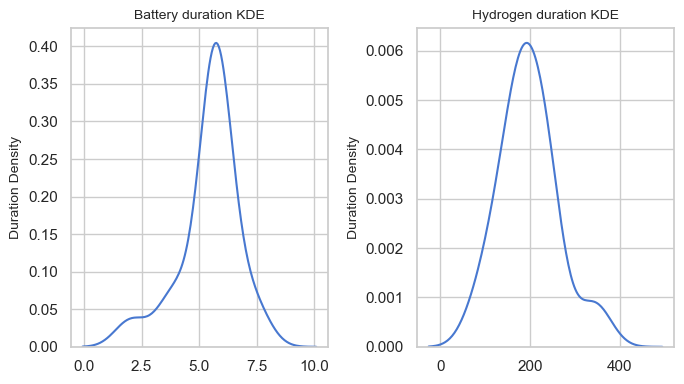

In [27]:
sns.set(style="whitegrid", palette="muted")
fig = plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(121)
sns.kdeplot(battery, bw_method=0.55, legend=True, label="Battery", ax=ax1)
ax1.set_title("Battery duration KDE", fontsize=10)
ax1.set_ylabel("Duration Density", fontsize=10)
ax2 = fig.add_subplot(122)
sns.kdeplot(H2, bw_method=0.55, legend=True, label="H2", ax=ax2)
ax2.set_title("Hydrogen duration KDE", fontsize=10)
ax2.set_ylabel("Duration Density", fontsize=10)
plt.tight_layout()
plt.savefig("KDE for battery and hydrogen.pdf",bbox_inches='tight')
plt.show()

EP ratios for MDES calculation

In [28]:
store_MDES = sto_cap[sto_cap.index == "MDES"].set_index("region")
discharge_MDES = sto_cap[sto_cap.index == "mdes-discharger"].set_index("region")

In [29]:
# EP_ratios calculation

threshold = 50 #MW
ratio = np.where(discharge_MDES >= threshold, store_MDES / discharge_MDES, 0)

# converted into dataframe
EP_ratios = pd.DataFrame(ratio, index=store_MDES.index, columns=store_MDES.columns)

In [30]:
EP_ratios # discharger EP ratios

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,644.798680,737.193173,743.990904,0.000000,0.000000,0.000000,0.000000,0.000000,497.003228,692.962900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BA1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.187073,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BE1 0,274.493109,332.453557,378.779158,362.213510,390.087246,372.631707,348.338857,354.976835,147.967598,596.601771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BG1 0,566.914045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.038433,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH1 0,108.597337,204.728147,231.430579,274.736194,295.493357,300.910231,273.420476,317.962557,118.157939,168.195725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CZ1 0,84.326883,144.980561,145.017269,159.586158,180.650884,188.204696,198.955306,228.882858,99.747163,169.008058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE1 0,347.031626,415.591038,399.836016,410.507746,403.877724,369.233012,314.249054,297.237627,331.891096,409.226678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK1 0,190.782301,319.038343,311.205384,297.545345,317.142271,408.812184,442.413813,392.223466,175.812349,236.812916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Two kinds of EP ratios for the system with largest system value

In [65]:
charge_MDES = sto_cap[sto_cap.index == "mdes-charger"].set_index("region")

In [66]:
# EP_ratios calculation

threshold = 50 #MW
ratio_ch = np.where(charge_MDES >= threshold, store_MDES / charge_MDES, 0)

# converted into dataframe
EP_ratios_ch = pd.DataFrame(ratio_ch, index=store_MDES.index, columns=store_MDES.columns)

In [67]:
# add one column for calssifying the types of EP ratios
EP_ratios_ch["EP ratios"] = 'EP ratios for charger'
EP_ratios["EP ratios"] = 'EP ratios for discharger'

In [68]:
ratio_merged = pd.concat([EP_ratios_ch, EP_ratios])

In [70]:
# convert the data into Series with identifier and the column names represent networks to show the design parameters and costs
df_EP = pd.melt(ratio_merged, id_vars='EP ratios', var_name='Variables', value_name='Energy-to-power ratio')
df_EP.head() # 37*280*2 dots

,EP ratios,Variables,Energy-to-power ratio
0,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,219.009152
1,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,0.000000
2,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,0.000000
3,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,364.007711
4,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,208.816957


In [69]:
ratio_merged.head()

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8,EP ratios
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,219.009152,406.937506,623.478030,0.000000,0.000000,0.000000,0.000000,0.000000,164.679616,232.164239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
AT1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BA1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,335.236199,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BE1 0,364.007711,466.726245,976.732476,1143.970738,1284.559982,1532.743190,2025.013022,2421.302605,188.513779,751.636875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BG1 0,208.816957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.323181,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RO1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for discharger
RS1 0,639.906545,757.367183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,552.738018,698.184477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for discharger
SE2 0,34.108459,103.607946,0.000000,0.000000,116.478491,0.000000,0.000000,0.000000,52.312325,67.668277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for discharger


In [71]:
df_EP[df_EP["EP ratios"]== 'EP ratios for charger'].sort_values(by = "Energy-to-power ratio", ascending=False)

,EP ratios,Variables,Energy-to-power ratio
2892,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.8,4820.594708
5586,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c7-mdes+e0.8,4679.630384
5660,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c9-mdes+e0.8,4557.047127
2300,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.7,4204.752896
4920,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c5-mdes+e0.7,3882.292880
...,...,...,...
9507,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9506,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9505,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9504,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000


C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

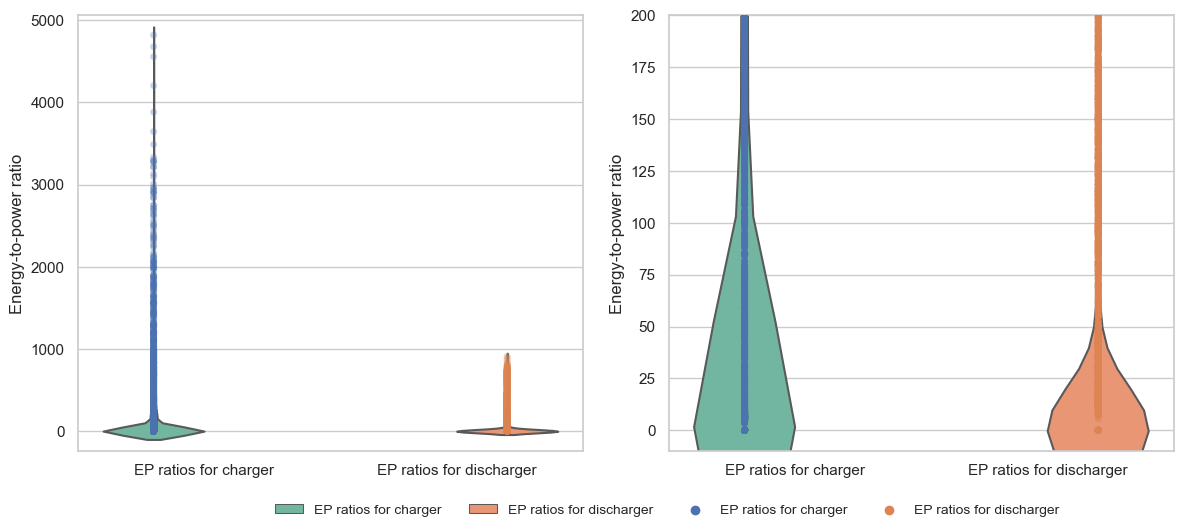

In [72]:
sns.set(style="whitegrid", palette="muted")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# create violin plot
sns.violinplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
               alpha=0.3, ax=ax1, inner=None, palette="Set2")
sns.violinplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
               alpha=0.5, ax=ax2, inner=None, palette="Set2")

# create stripplot
sns.stripplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
              alpha=0.3, ax=ax1, jitter=False, dodge=True, palette="deep")
sns.stripplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
              alpha=0.5, ax=ax2, jitter=False, dodge=True, palette="deep")

# remove the legend and xlabel of subplots
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xlabel('')
ax2.set_xlabel('')

# add one legend
handles1, labels1 = ax1.get_legend_handles_labels()
fig.legend(handles1, labels1, bbox_to_anchor=(0.9, 0.01), ncol=4, fontsize=10, frameon=False)
plt.tight_layout()
plt.ylim(-10,200)
plt.savefig("Comparison of Optimal Energy to Power Ratios Ranges.pdf", bbox_inches='tight')
plt.show()

2.2 Storage duration analysis

In [31]:
duration_MDES = EP_ratios*efficiency

In [32]:
MDES = duration_MDES.values.flatten()[duration_MDES.values.flatten()>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



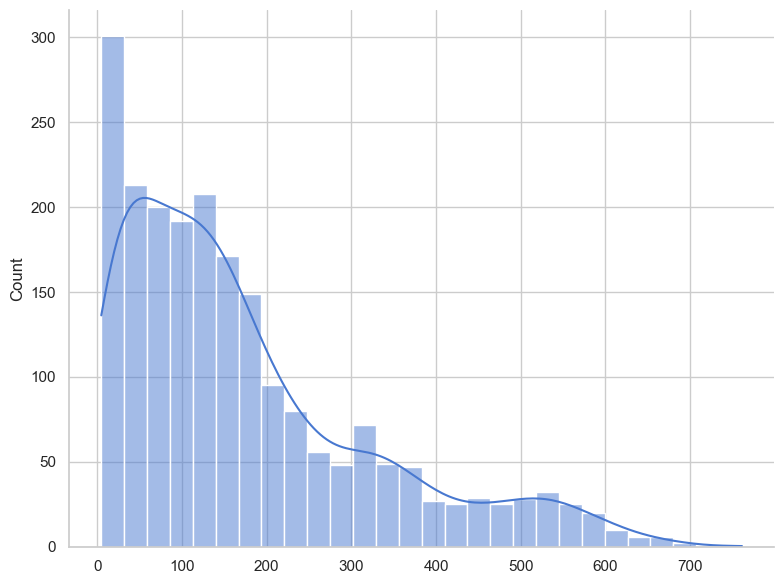

In [33]:
sns.displot(data=MDES, kde=True, height=6, aspect=8/6)
plt.show()

In [34]:
scatter_MDES=pd.DataFrame()
for i in np.arange(280):
    opt=duration_MDES.columns
    df=duration_MDES.iloc[:,i].to_frame()
    df['opts']=[opt[i]]*len(df)
    pattern_MDES = r'MDES\+c(\d+)'
    pattern_mdes = r'mdes\+c(\d+)'
    pattern_mdes_e = r'mdes\+e([0-9.]+)'
    df['Energy capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_MDES, x).group(1)) if re.search(pattern_MDES, x) else None)
    df['Power capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_mdes, x).group(1))*100 if re.search(pattern_mdes, x) else None)
    df['Round-trip efficiency'] = df.opts.apply(lambda x: int(float(re.search(pattern_mdes_e, x).group(1))*100) if re.search(pattern_mdes_e, x) else None)
    df.drop("opts",axis='columns', inplace=True)
    df.rename(columns={opt[i]:'duration [h]'}, inplace=True)
    scatter_MDES = pd.concat([scatter_MDES, df], axis=0)

In [35]:
scatter_MDES

,duration [h],Energy capacity cost,Power capacity cost,Round-trip efficiency
region,,,,
AL1 0,353.170782,1,100,30
AT1 0,0.000000,1,100,30
BA1 0,0.000000,1,100,30
BE1 0,150.346068,1,100,30
BG1 0,310.511610,1,100,30
...,...,...,...,...
RO1 0,0.000000,150,1500,80
RS1 0,0.000000,150,1500,80
SE2 0,0.000000,150,1500,80


In [36]:
p100 = scatter_MDES[scatter_MDES["Power capacity cost"]==100]
p100 = p100[p100['duration [h]']>0]
p300 = scatter_MDES[scatter_MDES["Power capacity cost"]==300]
p300 = p300[p300['duration [h]']>0]
p500 = scatter_MDES[scatter_MDES["Power capacity cost"]==500]
p500 = p500[p500['duration [h]']>0]
p700 = scatter_MDES[scatter_MDES["Power capacity cost"]==700]
p700 = p700[p700['duration [h]']>0]
p900 = scatter_MDES[scatter_MDES["Power capacity cost"]==900]
p900 = p900[p900['duration [h]']>0]
p1100 = scatter_MDES[scatter_MDES["Power capacity cost"]==1100]
p1100 = p1100[p1100['duration [h]']>0]
p1300 = scatter_MDES[scatter_MDES["Power capacity cost"]==1300]
p1300 = p1300[p1300['duration [h]']>0]
p1500 = scatter_MDES[scatter_MDES["Power capacity cost"]==1500]
p1500 = p1500[p1500['duration [h]']>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

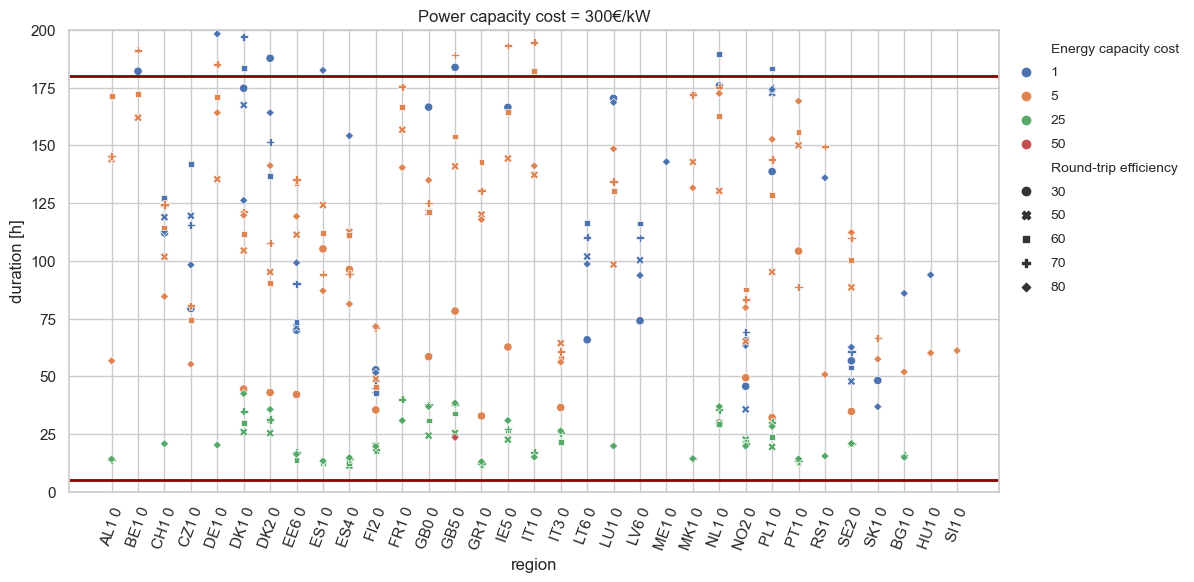

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p300, palette="deep", style='Round-trip efficiency')
plt.axhline(y=5, ls="-", c="darkred", linewidth=2)
plt.axhline(y=180, ls="-", c="darkred", linewidth=2)
plt.xticks(rotation=70)
plt.legend(ncol=1, prop={'size':10},bbox_to_anchor=(1, 1), labelspacing=0.8, frameon=False)
plt.title("Power capacity cost = 300€/kW")
plt.ylim(0,200)
plt.show()

In [38]:
d_coefficent = np.around(scatter_MDES.corr(method='pearson'), decimals=2)
d_coefficent # correlation between parameters and duration

,duration [h],Energy capacity cost,Power capacity cost,Round-trip efficiency
duration [h],1.00,-0.4,-0.03,0.09
Energy capacity cost,-0.40,1.0,-0.00,0.00
Power capacity cost,-0.03,-0.0,1.00,-0.00
Round-trip efficiency,0.09,0.0,-0.00,1.00


In [64]:
d_coefficent.to_csv("Pearson correlation coefficients of MDES duration.csv")

The charging energy is not necessarily equal to discharge energy. It is clear that the charging process need to cost longer time than discharging process.

3. Modelled LCOS is analyzed in the other jupyter notebook